# Unit 5 - Financial Planning

In [232]:
# Initial imports
import requests
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
load_dotenv() # Load .env enviroment variables

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

In [ ]:
print(btc_price)
print(eth_price)

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [ ]:
current_date = pd.Timestamp("today", tz="America/Chicago").isoformat()

In [ ]:
def parse_date(current_date=None):
    if current_date == None:
        current_date = current_date=pd.Timestamp("today", tz="America/Chicago").isoformat()
    
    current_year = current_date[0:4]
    current_month = current_date[5:7]
    current_day = current_date[8:10]
    # current_day
    return [current_year,current_month,current_day,current_date]

In [ ]:
print(parse_date())

In [ ]:
# def get_dates(delta=1000, time_unit='day'):
#     current_date = pd.Timestamp("today", tz="America/Chicago")
#     start_date = current_date - pd.to_timedelta(delta, unit=time_unit)
#     start_date_str = f"{start_date.year}-{start_date.month:02}-{start_date.day:02}"
#     end_date_str = f"{current_date.year}-{current_date.month:02}-{current_date.day:02}"
    
#     dates = {
#         # 'current_date': current_date,
#         'start_date_str': start_date_str,
#         'end_date_str': end_date_str
#     }
#     return dates

In [ ]:
# get_dates(5,'d')

In [ ]:
start_date = current_date - pd.to_timedelta(1000, unit='d')
start_date_str = f"{start_date.year}-{start_date.month:02}-{start_date.day:02}"

In [ ]:
end_date_str = f"{current_date.year}-{current_date.month:02}-{current_date.day:02}"

In [ ]:
api = REST(key_id = alpaca_api_key, secret_key = alpaca_secret_key)
# type(api)

In [ ]:
# print(start_date_str)
# print(end_date_str)

In [ ]:
tickers = ["AGG", "SPY"]

In [ ]:
df = api.get_bars(tickers, tradeapi.TimeFrame(1, tradeapi.TimeFrameUnit.Day), start_date_str, limit=1000).df

In [ ]:
df_stock_data = df.copy() # backup

In [ ]:
df # Preview DataFrame

In [ ]:
# Format current date as ISO format

In [ ]:
# Pick AGG and SPY close prices
agg_close_price = df.iloc[-1]['close']
spy_close_price = df.iloc[-1]['close']

In [ ]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.3f}")
print(f"Current SPY closing price: ${spy_close_price:.3f}")

In [ ]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

### Savings Health Analysis

In [ ]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_spy_value + my_agg_value

assets = ['crypto','shares']

value_data ={
    'amount': [my_crypto_value,my_shares_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=assets)
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

In [ ]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Distribution of Savings", figsize=(10,10))

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(value_data['amount'])

print("An ideal emergency fund should be equal to 3 times your monthly income.\n")

print(f"\tSavings goal: ${emergency_fund:,.2f}\n")

# Validate saving health
if total_savings > emergency_fund:
    print(f"\tCongratulations, you have enough money in this fund. You have exceeded the goal by ${total_savings - emergency_fund:,.2f}.")
elif total_savings == emergency_fund:
    pring("\tCongratulations, you have met your financial goal.")
else:
    print(f"\tYou are ${(emergency_fund - total_savings):,2.f} away from your goal.")
    


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
parsed_date = parse_date()
end_date = parsed_date[-1]
# end_date = pd.Timestamp('today', tz='America/New_York')#.isoformat()

start_year = str(int(parsed_date[0]) - 5)
# start_year = end_date.year - 5
# start_date_str = f"{str(int(end_date).year - 5)}-{start_date.month:02}-{start_date.day:02}"
# start_date = pd.Timestamp(start_date_str, tz='America/New_York')#.isoformat()


start_year

In [ ]:
get_dates()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df = df_stock_data.concat#.head()

In [ ]:
agg = df_stock_data.loc[df['symbol'] == 'AGG']

In [199]:
spy = df_stock_data.loc[df['symbol'] == 'SPY']
spy = spy.drop(['trade_count','vwap', 'symbol'], axis=1)
spy

,open,high,low,close,volume
timestamp,,,,,
2019-06-25 04:00:00+00:00,293.67,293.73,290.6400,290.78,82344336
2019-06-26 04:00:00+00:00,291.78,292.31,290.3450,290.51,52064906
2019-06-27 04:00:00+00:00,291.29,292.06,290.8900,291.52,40484164
2019-06-28 04:00:00+00:00,292.57,293.55,292.0100,293.10,59508955
2019-07-01 04:00:00+00:00,296.68,296.92,294.3300,295.58,79264778
...,...,...,...,...,...
2020-09-08 04:00:00+00:00,336.25,342.64,332.8800,333.27,115301649
2020-09-09 04:00:00+00:00,337.63,342.46,336.6100,339.77,91158708
2020-09-10 04:00:00+00:00,341.84,342.53,332.8500,334.13,90710586


In [200]:
agg = df_stock_data.loc[df['symbol'] == 'AGG']
agg = agg.drop(['trade_count','vwap', 'symbol'], axis=1)
agg

,open,high,low,close,volume
timestamp,,,,,
2019-06-25 04:00:00+00:00,111.36,111.4400,111.2200,111.34,3111092
2019-06-26 04:00:00+00:00,111.29,111.3100,111.0600,111.09,3703224
2019-06-27 04:00:00+00:00,111.25,111.4100,111.1633,111.40,2963646
2019-06-28 04:00:00+00:00,111.36,111.4684,111.3200,111.35,9887791
2019-07-01 04:00:00+00:00,111.25,111.2700,111.0100,111.18,4211486
...,...,...,...,...,...
2022-03-15 04:00:00+00:00,107.83,107.9200,107.4300,107.60,13841071
2022-03-16 04:00:00+00:00,107.63,107.7300,107.0032,107.68,15809171
2022-03-17 04:00:00+00:00,107.87,108.0600,107.7300,107.86,8005258


In [205]:
df = pd.concat([agg,spy], axis = 1, keys=['agg','spy'])

In [223]:
df.dropna(inplace=True)

In [224]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [225]:
# Printing the simulation input data
MC_even_dist.portfolio_data

agg                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-06-25 04:00:00+00:00  111.36  111.4400  111.2200  111.34  3111092   
2019-06-26 04:00:00+00:00  111.29  111.3100  111.0600  111.09  3703224   
2019-06-27 04:00:00+00:00  111.25  111.4100  111.1633  111.40  2963646   
2019-06-28 04:00:00+00:00  111.36  111.4684  111.3200  111.35  9887791   
2019-07-01 04:00:00+00:00  111.25  111.2700  111.0100  111.18  4211486   
...                           ...       ...       ...     ...      ...   
2020-09-08 04:00:00+00:00  118.34  118.4600  118.2000  118.23  8894007   
2020-09-09 04:00:00+00:00  118.39  118.3900  118.0400  118.22  7824768   
2020-09-10 04:00:00+00:00  118.25  118.2900  118.0150  118.23  4932623   
2020-09-11 04:00:00+00:00  118.42  118.4900  118.2400  118.37  8200574   
2020-09-14 04:00:00+00:00  118.47  118.4900  118.3100  118.38  6394336   

                                           spy                            \
                          daily_return    open    high       low   close   
timestamp                                                                  
2019-06-25 04:00:00+00:00          NaN  293.67  293.73  290.6400  290.78   
2019-06-26 04:00:00+00:00    -0.002245  291.78  292.31  290.3450  290.51   
2019-06-27 04:00:00+00:00     0.002791  291.29  292.06  290.8900  291.52   
2019-06-28 04:00:00+00:00    -0.000449  292.57  293.55  292.0100  293.10   
2019-07-01 04:00:00+00:00    -0.001527  296.68  296.92  294.3300  295.58   
...                                ...     ...     ...       ...     ...   
2020-09-08 04:00:00+00:00     0.001101  336.25  342.64  332.8800  333.27   
2020-09-09 04:00:00+00:00    -0.000085  337.63  342.46  336.6100  339.77   
2020-09-10 04:00:00+00:00     0.000085  341.84  342.53  332.8500  334.13   
2020-09-11 04:00:00+00:00     0.001184  335.79  336.97  331.0000  334.09   
2020-09-14 04:00:00+00:00     0.000084  337.52  340.38  334.2208  338.44   

                                                     
                                volume daily_return  
timestamp                                            
2019-06-25 04:00:00+00:00   82344336.0          NaN  
2019-06-26 04:00:00+00:00   52064906.0    -0.000929  
2019-06-27 04:00:00+00:00   40484164.0     0.003477  
2019-06-28 04:00:00+00:00   59508955.0     0.005420  
2019-07-01 04:00:00+00:00   79264778.0     0.008461  
...                                ...          ...  
2020-09-08 04:00:00+00:00  115301649.0    -0.026523  
2020-09-09 04:00:00+00:00   91158708.0     0.019504  
2020-09-10 04:00:00+00:00   90710586.0    -0.016599  
2020-09-11 04:00:00+00:00   84880694.0    -0.000120  
2020-09-14 04:00:00+00:00   66041974.0     0.013020  

[309 rows x 12 columns]

In [226]:

# YOUR CODE HERE!

In [227]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jeffbrinker/Library/CloudStorage/OneDrive-SPRConsulting/fintech/homework-all/05-APIs/05-APIs-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995402,0.984147,0.994489,0.990199,0.992491,0.980154,0.999913,0.990168,0.999205,0.996694,...,1.000295,0.994520,0.987998,0.985118,1.007578,0.987851,0.997373,0.985714,0.987469,1.016900
2,0.995140,0.981865,1.009255,0.976846,0.982513,0.978255,0.993714,0.988624,1.002355,1.008252,...,1.003470,0.994060,0.973393,0.982865,1.005532,0.983478,0.981577,1.003193,0.989117,1.023101
3,0.990409,0.970969,1.011457,0.984974,0.974894,0.987475,0.995889,0.995684,1.001467,0.999311,...,0.999215,0.992370,0.992893,0.985851,0.995390,0.994682,0.985527,0.996442,0.975222,1.024326
4,0.990924,0.964594,1.006707,0.986177,0.967249,0.961107,1.000949,0.995100,0.998539,1.008719,...,0.997925,0.996153,0.986928,0.980278,0.991177,0.977899,0.979998,0.995575,0.987567,1.014717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.971682,0.919121,1.695166,1.590499,2.167985,1.566693,1.173987,2.824725,1.187338,1.964618,...,1.757755,1.232026,0.878528,0.850253,2.142623,1.125339,1.562662,1.429432,2.008267,1.138182
1257,0.971012,0.918186,1.653035,1.591521,2.181540,1.578477,1.162425,2.801693,1.178938,1.951491,...,1.730339,1.238836,0.881953,0.845839,2.161325,1.125432,1.583860,1.420720,1.985111,1.123413
1258,0.965086,0.929117,1.684443,1.597325,2.221670,1.587325,1.155571,2.820824,1.171748,1.962969,...,1.713348,1.245477,0.876521,0.870551,2.156042,1.130269,1.591038,1.394810,1.992040,1.096332
1259,0.974544,0.925970,1.660982,1.609962,2.235226,1.582955,1.147697,2.784445,1.188483,1.973575,...,1.715991,1.264593,0.894378,0.871712,2.135063,1.134416,1.607288,1.405791,2.030019,1.090762


In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!
# plt
fig,ax = plt.subplots()

mc_plot = MC_even_dist.plot_simulation()
ax = mc_plot.plot(figsize=(10,20))
# plt.Figure(figsize=(10,10))
# ax.plot()
# mc_plot
# plt.show()
# plt.subplots(mc_plot,figsize=(10,10))
# plt.show()

ax


In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

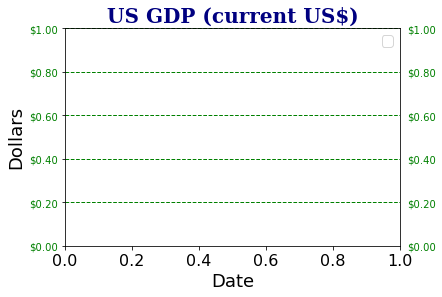

In [249]:
# import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# mc_plot.plot(figsize=(16, 8), label='Inline label', ax=ax)
plt.title('US GDP (current US$)', fontdict={'size': 20, 'family': 'serif', 'weight': 'heavy', 'color':  'navy'})
plt.xlabel('Date', fontdict={'size': 18, 'family': 'sans', 'weight': 'normal'})
plt.ylabel('Dollars', fontdict={'size': 18, 'family': 'sans', 'weight': 'normal'})
ax.yaxis.set_major_formatter('${x:1,.2f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green', labelleft=True, labelright=True)
plt.rc('xtick', labelsize=16)  
plt.legend(['GDP Value'], fontsize=14)
plt.grid(color='g', linestyle='--', linewidth=1, axis='y')

plt.show()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")